In [1]:
fn = './results/ae_train_1kg_val_1kg_f0/confusion_matrix_bubble_epoch107.csv'
# rows are predicted, columns are expected
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conf_mat = pd.read_csv(fn,header=None)
print(conf_mat)
conf_mat = np.array(conf_mat)
# rows are predicted, columns are expected

       0     1      2          3      4      5     6      7      8      9   \
0   100.0   0.0    0.0   0.000000    0.0    0.0   0.0    0.0    0.0    0.0   
1     0.0  50.0    0.0   0.000000    0.0    0.0   0.0    0.0    0.0    0.0   
2     0.0   0.0  100.0   0.000000    0.0    0.0   0.0    0.0    0.0    0.0   
3     0.0   0.0    0.0  66.666667    0.0    0.0   0.0    0.0    0.0    0.0   
4     0.0  50.0    0.0  33.333333  100.0    0.0   0.0    0.0    0.0    0.0   
5     0.0   0.0    0.0   0.000000    0.0  100.0   0.0    0.0    0.0    0.0   
6     0.0   0.0    0.0   0.000000    0.0    0.0  50.0    0.0    0.0    0.0   
7     0.0   0.0    0.0   0.000000    0.0    0.0   0.0  100.0    0.0    0.0   
8     0.0   0.0    0.0   0.000000    0.0    0.0   0.0    0.0  100.0    0.0   
9     0.0   0.0    0.0   0.000000    0.0    0.0   0.0    0.0    0.0  100.0   
10    0.0   0.0    0.0   0.000000    0.0    0.0   0.0    0.0    0.0    0.0   
11    0.0   0.0    0.0   0.000000    0.0    0.0   0.0    0.0    

In [3]:
populations = [
    'BEB', 'CDX', 'CEU+GBR', 'CHB', 'CHS', 'CLM', 'ESN', 'FIN', 'GWD', 
    'IBS', 'JPT', 'KHV', 'LWK', 'MSL', 'PEL', 'PJL', 'PUR', 'TSI', 'YRI']
labels = populations
print(labels)

['BEB', 'CDX', 'CEU+GBR', 'CHB', 'CHS', 'CLM', 'ESN', 'FIN', 'GWD', 'IBS', 'JPT', 'KHV', 'LWK', 'MSL', 'PEL', 'PJL', 'PUR', 'TSI', 'YRI']


In [4]:
# # remove and merge categories

# # remove 'ACB', 'ASW', 'GIH', 'ITU', 'MXL', 'STU'
# conf_mat = np.delete(conf_mat, [0, 1, 11, 14, 19, 23], axis=0)
# conf_mat = np.delete(conf_mat, [0, 1, 11, 14, 19, 23], axis=1)
# categories = np.delete(categories, [0, 1, 11, 14, 19, 23])
# [(i, j) for i,j in enumerate(categories)]

In [5]:
# # # merge 'GBR' and 'CEU'
# conf_mat[:, 2] = conf_mat[:, 2] /2 + conf_mat[:, 8] /2
# conf_mat[2,:] = conf_mat[2,:] + conf_mat[8,:]
# # remove GBR
# conf_mat = np.delete(conf_mat, 8, axis=1)
# conf_mat = np.delete(conf_mat, 8, axis=0)
# # update categories
# categories = np.delete(categories, 8)

# [print(i, j) for i,j in enumerate(categories)]
# labels = list(categories)
# labels[2] = 'CEU+GBR'
# print(labels)

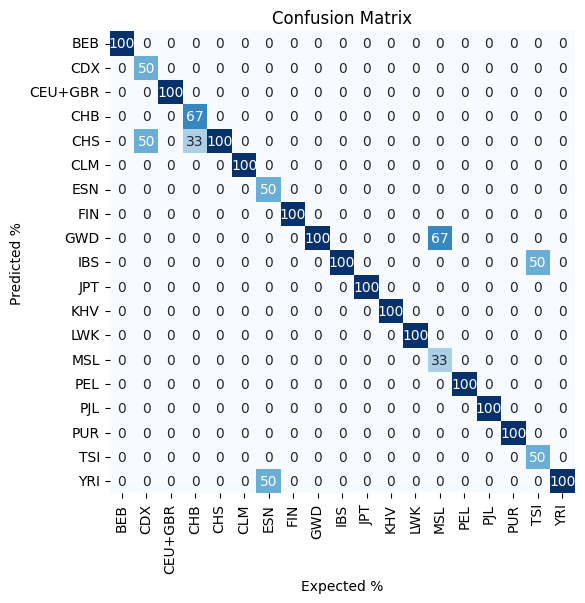

In [6]:
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', cbar=False, 
            xticklabels=labels, yticklabels=labels, fmt='.0f')
plt.title('Confusion Matrix')
plt.xlabel('Expected %')
plt.ylabel('Predicted %')
plt.show()

In [7]:
def get_power(df, degree=0):
    # df is a pandas dataframe of shape (n_classes, n_classes)
    # power: among the expected positive, how many are predicted related
    # rows are expected, columns are predicted
    expected_pos = df.iloc[degree, :].sum()
    predicted_pos = df.iloc[:, degree].sum()
    true_pos = df.iloc[degree, degree]
    predicted_unrelated = df.iloc[degree, 0].sum()
    power = 1 - (predicted_unrelated/expected_pos)
    recall = true_pos/expected_pos
    precision = true_pos/predicted_pos
    f1 = 2*precision*recall/(precision+recall)
    return power*100, recall*100, precision*100, f1*100


In [8]:
def get_F1_score(conf_mat):
    # conf_mat is a numpy array of shape (n_classes, n_classes)
    # rows are predicted, columns are expected
    # return a list of F1 scores for each class
    df = conf_mat.T # rows are expected, columns are predicted
    df = pd.DataFrame(df)
    F1_scores = []
    for i in range(df.shape[0]):
        F1_scores.append(get_power(df, i)[3])
    return F1_scores

f1 = get_F1_score(conf_mat)
[print(i,j) for i,j in zip(labels, f1)]

overall_F1 = np.mean(f1)
print(f'Overall F1 score: {overall_F1}')

BEB 100.0
CDX 66.66666666666666
CEU+GBR 100.0
CHB 80.0
CHS 70.58823529411767
CLM 100.0
ESN 66.66666666666666
FIN 100.0
GWD 75.00000000000001
IBS 80.0
JPT 100.0
KHV 100.0
LWK 100.0
MSL 50.0
PEL 100.0
PJL 100.0
PUR 100.0
TSI 66.66666666666666
YRI 80.0
Overall F1 score: 86.08359133126936
